In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import OrderedDict
import math

In [2]:
data_frame = pd.read_csv("netflix_titles.csv")

In [4]:
print('\nColumns with missing value:') 
print(data_frame.isnull().sum())


Columns with missing value:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [5]:
data_frame.shape

(8807, 12)

In [6]:
for i in data_frame.columns:
    nullColumns = data_frame[i].isna()
    nullRate=nullColumns.sum()/len(data_frame) * 100
    if nullRate > 0 :
        print("null rate of",i,": ",round(nullRate,2))

null rate of director :  29.91
null rate of cast :  9.37
null rate of country :  9.44
null rate of date_added :  0.11
null rate of rating :  0.05
null rate of duration :  0.03


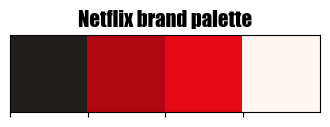

In [7]:
sns.palplot(sns.color_palette(['#221e1e', '#b20611', '#e60813','#fff6f2']))
plt.title("Netflix brand palette",loc='center',fontfamily='fantasy',fontsize=15)
plt.savefig('brand_palette.png')
plt.show()

In [8]:
#selecting for countries 

filtered_countries = data_frame.country.str.split(",").dropna()
countryDict=dict()

for countries in filtered_countries:
    for country in countries:
        country=country.strip()
        if country in countryDict:
            countryDict[country]+=1
        else:
            countryDict[country]=1

#Top 15 countries by number of movies
d_descending = OrderedDict(sorted(countryDict.items(), key=lambda kv: kv[1], reverse=True))
d_descending=list(d_descending.items())
d_descending=d_descending[:15]
print(d_descending)

[('United States', 3690), ('India', 1046), ('United Kingdom', 806), ('Canada', 445), ('France', 393), ('Japan', 318), ('Spain', 232), ('South Korea', 231), ('Germany', 226), ('Mexico', 169), ('China', 162), ('Australia', 160), ('Egypt', 117), ('Turkey', 113), ('Hong Kong', 105)]


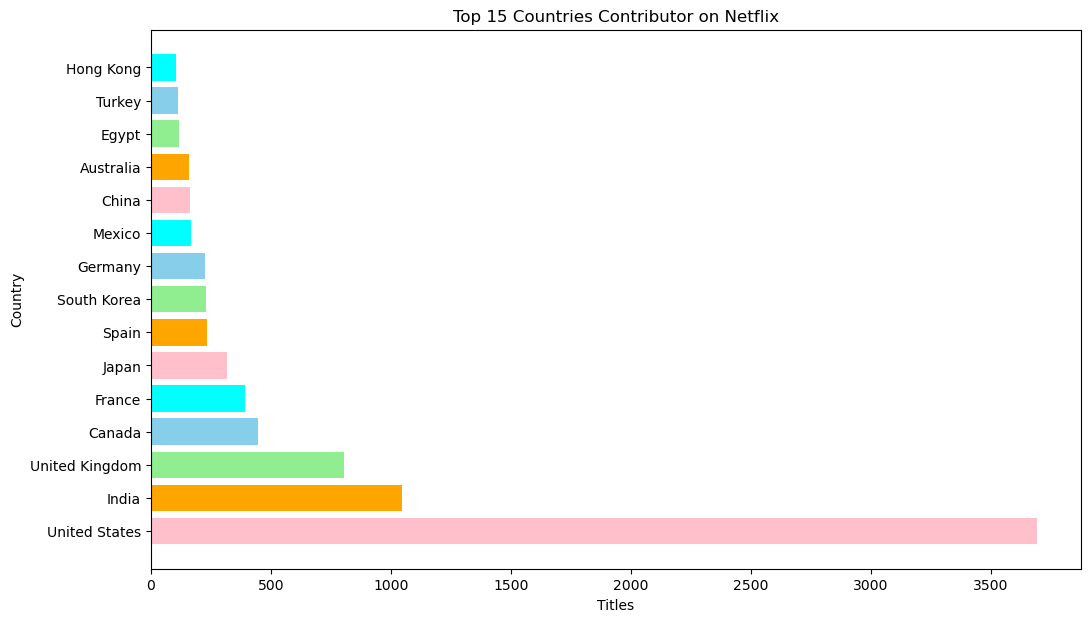

In [9]:
#filtered_countries = data_frame.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(12,7))
x_array=np.array([x[0] for x in d_descending])
y_array=np.array([x[1] for x in d_descending])
#g = sns.countplot(y = d_descending[:][0], order=d_descending[:][1])
plt.barh(x_array,y_array,color=['pink', 'orange', 'lightgreen', 'skyblue', 'cyan'])
plt.title('Top 15 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.savefig('1.png')
plt.show()

In [10]:
netflix_year_df=data_frame.groupby('release_year')
print(len(netflix_year_df))

74


In [11]:
data_frame.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [12]:
data_frame.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


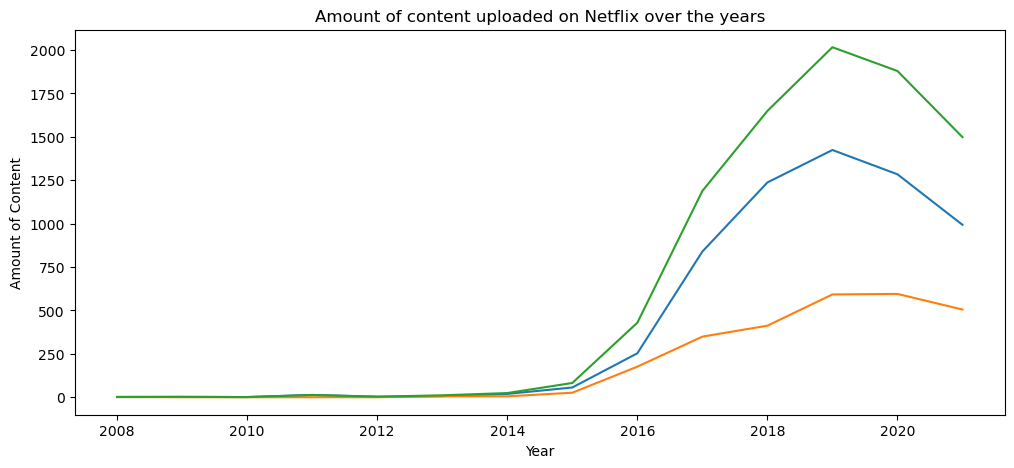

In [13]:
movies_count_by_year=dict()
shows_count_by_year=dict()
total_count_by_year=dict()
#print(data_frame)
for index,row in data_frame.iterrows():
    if(type(row['date_added'])!=type("str")):
        continue
    year=int(row['date_added'][-4:])
    if row['type']=='Movie':
        if year in movies_count_by_year:
            movies_count_by_year[year]+=1
        else:
            movies_count_by_year[year]=1
    else:
        if year in shows_count_by_year:
            shows_count_by_year[year]+=1
        else:
            shows_count_by_year[year]=1
    if year in total_count_by_year:
        total_count_by_year[year]+=1
    else:
        total_count_by_year[year]=1

for year in total_count_by_year.keys():
    if year not in shows_count_by_year:
        shows_count_by_year[year]=0
    if year not in movies_count_by_year:
        movies_count_by_year[year]=0
movies_count_by_year=list(sorted(movies_count_by_year.items(), key=lambda kv: kv[0]))
shows_count_by_year=list(sorted(shows_count_by_year.items(), key=lambda kv: kv[0]))
total_count_by_year=list(sorted(total_count_by_year.items(), key=lambda kv: kv[0]))

x_array=np.array([x[0] for x in total_count_by_year])
movies_y_array=np.array([x[1] for x in movies_count_by_year])
shows_y_array=np.array([x[1] for x in shows_count_by_year])
total_y_array=np.array([x[1] for x in total_count_by_year])
plt.figure(figsize=(12,5))
plt.plot(x_array,movies_y_array)
plt.plot(x_array,shows_y_array)
plt.plot(x_array,total_y_array)
plt.title("Amount of content uploaded on Netflix over the years")
plt.xlabel("Year")
plt.ylabel("Amount of Content")
plt.savefig('2.png')
plt.show()

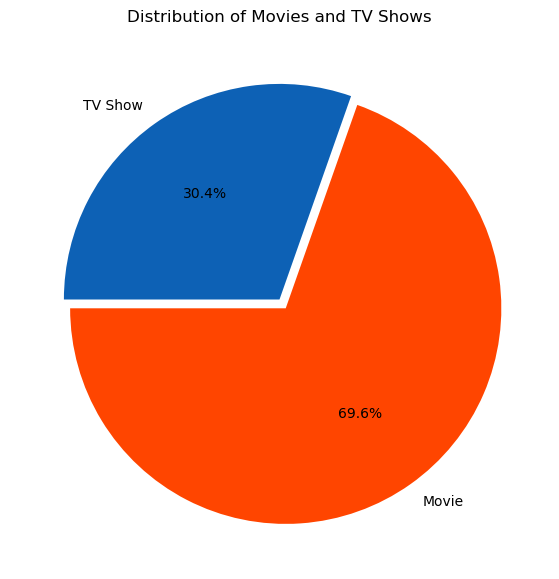

In [14]:
plt.figure(figsize=(12,7))
plt.title("Distribution of Movies and TV Shows")
g = plt.pie(data_frame.type.value_counts(),explode=(0.05,0.0), labels=data_frame.type.value_counts().index, colors=['orangered','#0D61B5'],autopct='%1.1f%%', startangle=180)
plt.savefig('3.png')
plt.show()

In [15]:

data_frame['country'] = data_frame['country'].fillna(data_frame['country'].mode()[0])
data_frame['cast'].replace(np.nan,'No data',inplace=True)
data_frame['director'].replace(np.nan,'No data',inplace=True)
data_frame.dropna(inplace=True)
print(data_frame.shape)
data_frame.drop_duplicates(inplace=True)
print(data_frame.shape)

(8790, 12)
(8790, 12)


ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1439. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [17]:
x = data_frame.groupby(['type'])['type'].count()
y = len(data_frame)
r=((x/y)).round(4)
movie_show_ratio = pd.DataFrame(r).T

<Figure size 1200x700 with 0 Axes>

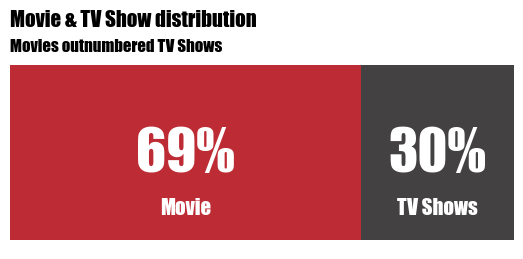

In [18]:
plt.figure(figsize=(12,7))
fig, ax = plt.subplots(1,1,figsize=(6.5,2.5))
ax.barh(movie_show_ratio.index, movie_show_ratio['Movie'], 
        color='#b20710', alpha=0.85, label='Movie')
ax.barh(movie_show_ratio.index, movie_show_ratio['TV Show'], left=movie_show_ratio['Movie'], 
        color='#221f1f', alpha=0.85, label='TV Show')
ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
for i in movie_show_ratio.index:
    ax.annotate(f"{int(movie_show_ratio['Movie'][i]*100)}%", xy=(movie_show_ratio['Movie'][i]/2, i),va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='fantasy',color='white')
    ax.annotate("Movie", xy=(movie_show_ratio['Movie'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='fantasy',color='white')
for i in movie_show_ratio.index:
    ax.annotate(f"{int(movie_show_ratio['TV Show'][i]*100)}%",xy=(movie_show_ratio['Movie'][i]+movie_show_ratio['TV Show'][i]/2,i),va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='fantasy',color='white')
    ax.annotate("TV Shows", xy=(movie_show_ratio['Movie'][i]+movie_show_ratio['TV Show'][i]/2, -0.25),va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='fantasy',color='white')
fig.text(0.125,1.0,'Movie & TV Show distribution',fontfamily='fantasy',fontsize=15,fontweight='bold')
fig.text(0.125,0.90,'Movies outnumbered TV Shows',fontfamily='fantasy',fontsize=12,fontweight='light')
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)
ax.legend().set_visible(False)

plt.savefig('4.png')
plt.show()

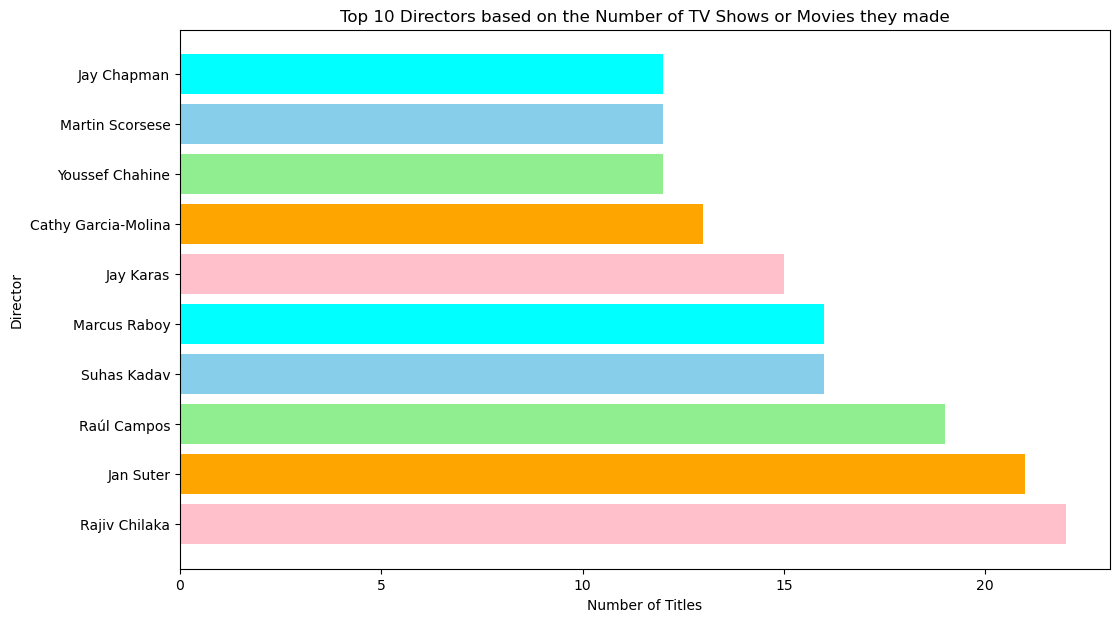

In [34]:

filtered_directors = data_frame.director.str.split(",")

directorDict=dict()

for directors in filtered_directors:
    for director in directors:
        if director=="No data":
            continue
        director=director.strip()
        if director in directorDict:
            directorDict[director]+=1
        else:
            directorDict[director]=1

d_descending = list(sorted(directorDict.items(), key=lambda kv: kv[1], reverse=True))
d_descending=d_descending[:10]
#print(d_descending)
plt.figure(figsize=(12,7))
x_array=np.array([x[0] for x in d_descending])
y_array=np.array([x[1] for x in d_descending])
#g = sns.countplot(y = d_descending[:][0], order=d_descending[:][1])
plt.barh(x_array,y_array,color=['pink', 'orange', 'lightgreen', 'skyblue', 'cyan'])
plt.title('Top 10 Directors based on the Number of TV Shows or Movies they made')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.savefig('5.png')
plt.show()

  rating  title_movies  title_shows
0     PG             1          0.0
1      R             2          0.0
2  TV-14            27          0.0
3  TV-MA             6          0.0
4  TV-PG             6          0.0


<Figure size 640x480 with 0 Axes>

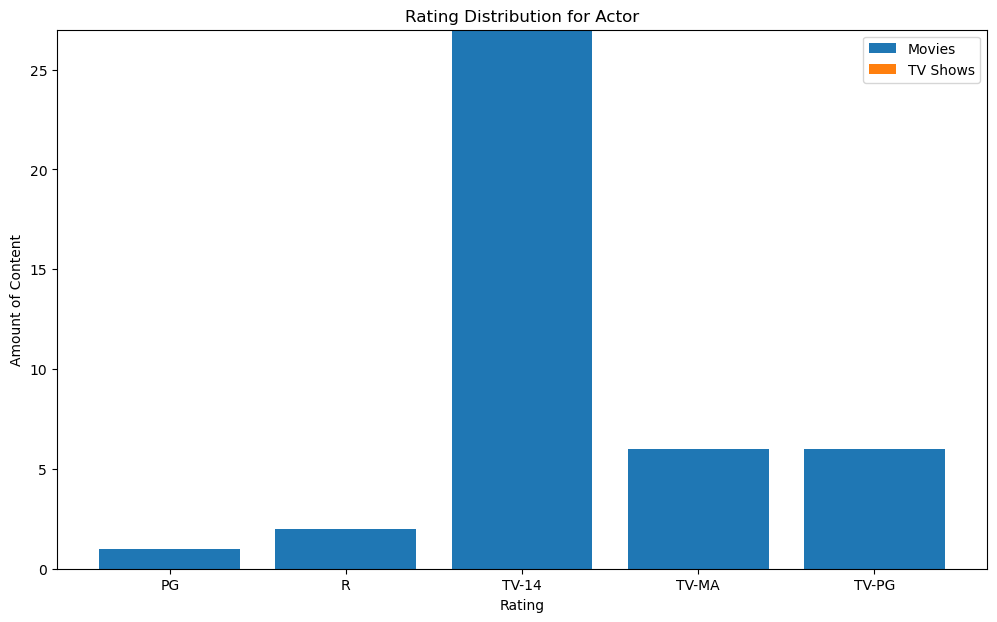

In [33]:
data_netflix=pd.read_csv('netflix_titles.csv')
data_netflix=data_netflix.dropna()

plt.clf()

data_actor=data_netflix[data_netflix['cast'].str.contains('Anupam Kher')]


netflix_movies_df=data_actor[data_actor.type=='Movie']
netflix_shows_df=data_actor[data_actor.type=='TV Show']
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()

all_combined=pd.merge(count_movies,count_shows,on='rating',how='outer',suffixes=('_movies', '_shows'))
all_combined=all_combined.fillna(0)
print(all_combined)
plt.figure(figsize=(12,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.xlabel("Rating")
plt.ylabel("Amount of Content")
plt.bar(all_combined.rating, all_combined.title_movies)
plt.bar(all_combined.rating, all_combined.title_shows, bottom=all_combined.title_movies)
plt.legend(['Movies','TV Shows'])
plt.title('Rating Distribution for Actor')
plt.show()

      rating  title_movies  title_shows
0          G            41          0.0
1      NC-17             3          0.0
2         NR            75          4.0
3         PG           287          0.0
4      PG-13           490          0.0
5          R           797          2.0
6      TV-14          1427        730.0
7       TV-G           126         94.0
8      TV-MA          2062       1143.0
9      TV-PG           540        321.0
10      TV-Y           131        175.0
11     TV-Y7           139        194.0
12  TV-Y7-FV             5          1.0
13        UR             3          0.0


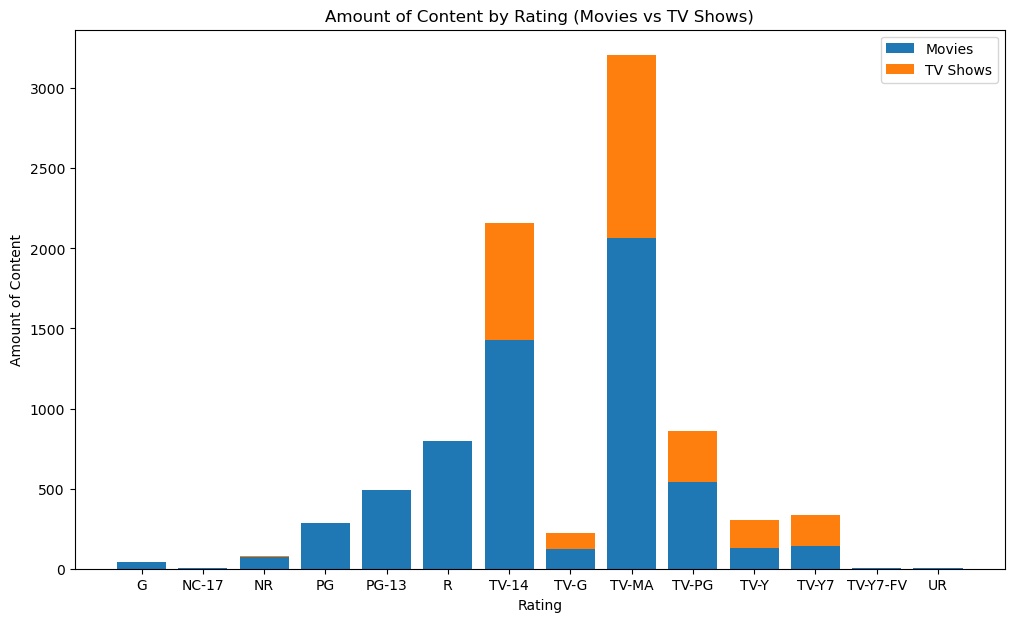

In [30]:
netflix_movies_df=data_frame[data_frame.type=='Movie']
netflix_shows_df=data_frame[data_frame.type=='TV Show']
count_movies = netflix_movies_df.groupby('rating')['title'].count().reset_index()
count_shows = netflix_shows_df.groupby('rating')['title'].count().reset_index()

all_combined=pd.merge(count_movies,count_shows,on='rating',how='outer',suffixes=('_movies', '_shows'))
all_combined=all_combined.fillna(0)
print(all_combined)
plt.figure(figsize=(12,7))
plt.title('Amount of Content by Rating (Movies vs TV Shows)')
plt.xlabel("Rating")
plt.ylabel("Amount of Content")
plt.bar(all_combined.rating, all_combined.title_movies)
plt.bar(all_combined.rating, all_combined.title_shows, bottom=all_combined.title_movies)
plt.legend(['Movies','TV Shows'])
plt.savefig('6.png')
plt.show()

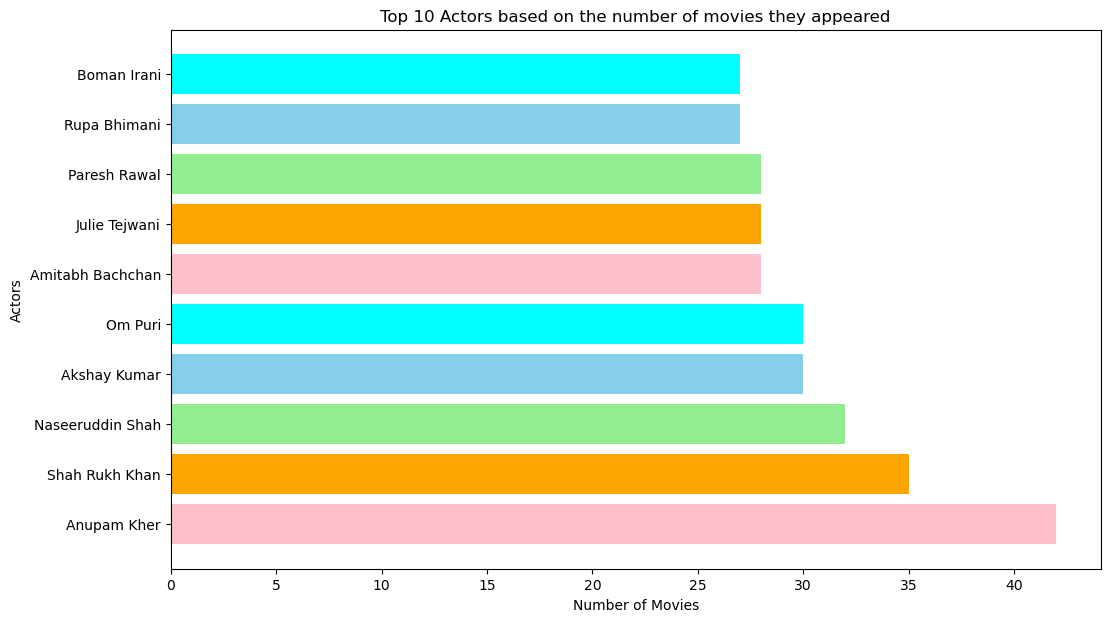

In [36]:
movie_actors_dict=dict()
shows_actors_dict=dict()
for index,row in data_frame.iterrows():
    filtered_actors = row['cast'].split(",")
    if row['type']=='Movie':
        for actor in filtered_actors:
            actor=actor.strip()
            actor=actor.strip()
            if actor=="No data":
                continue
            if actor in movie_actors_dict:
                movie_actors_dict[actor]+=1
                
            else:
                movie_actors_dict[actor]=1
                
    else:
        for actor in filtered_actors:
            actor=actor.strip()
            if actor=="No data":
                continue
            if actor in shows_actors_dict:
                shows_actors_dict[actor]+=1
            else:
                shows_actors_dict[actor]=1

movie_descending = list(sorted(movie_actors_dict.items(), key=lambda kv: kv[1], reverse=True))
movie_descending=movie_descending[:10]
#print(movie_descending)
movie_x_array=np.array([x[0] for x in movie_descending])
movie_y_array=np.array([x[1] for x in movie_descending])
plt.figure(figsize=(12,7))
plt.barh(movie_x_array,movie_y_array,color=['pink', 'orange', 'lightgreen', 'skyblue', 'cyan'])
plt.title("Top 10 Actors based on the number of movies they appeared")
plt.xlabel("Number of Movies")
plt.ylabel("Actors")
plt.savefig('7.png')
plt.show()
show_descending = list(sorted(shows_actors_dict.items(), key=lambda kv: kv[1], reverse=True))
show_descending=show_descending[:10]
#print(show_descending)
show_x_array=np.array([x[0] for x in show_descending])
show_y_array=np.array([x[1] for x in show_descending])


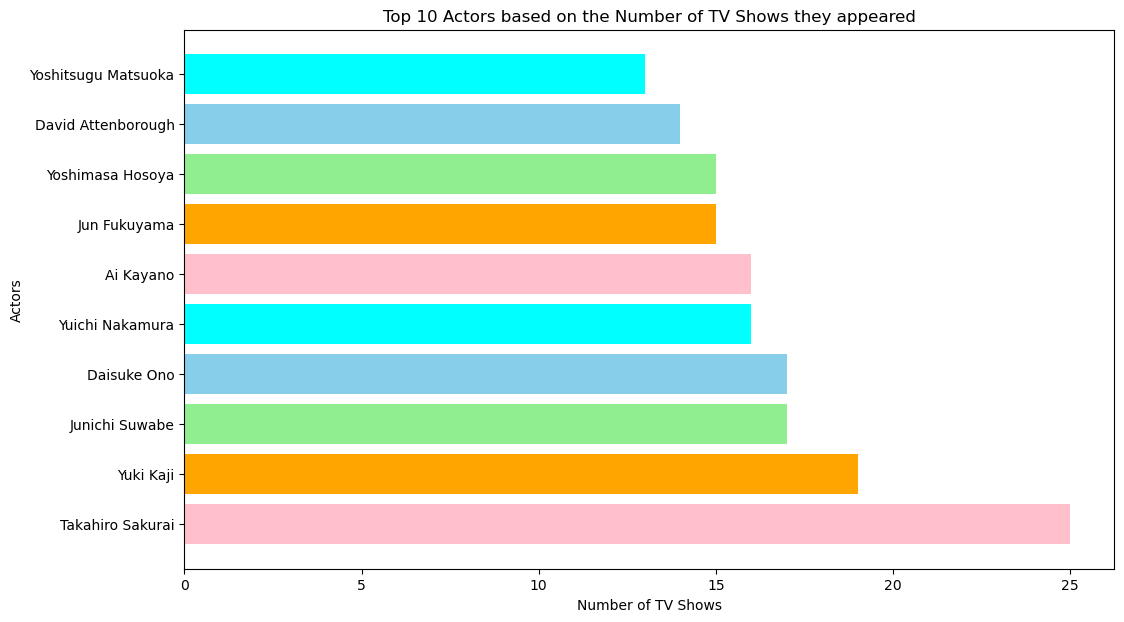

In [37]:
plt.figure(figsize=(12,7))
plt.barh(show_x_array,show_y_array,color=['pink', 'orange', 'lightgreen', 'skyblue', 'cyan'])
plt.title("Top 10 Actors based on the Number of TV Shows they appeared")
plt.xlabel("Number of TV Shows")
plt.ylabel("Actors")
plt.savefig('8.png')
plt.show()

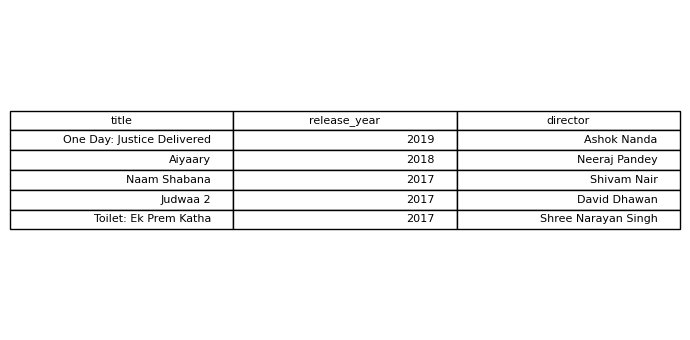

In [64]:
#5 latest releases by actor
data_actor=data_actor.sort_values(by=['release_year'],ascending=False)
data_latest=data_actor.head(5)
data_latest=data_latest[['title','release_year','director']]



data=[]
columns = ['title','release_year','director']

for i, j in data_latest.iterrows(): 
    curr=[]
    curr.append(j['title'])
    curr.append(str(j['release_year']))
    curr.append(j['director'])
    data.append(curr)


plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)

columns = ("title", "release_year", "director")
axs.axis('tight')
axs.axis('off')
the_table = axs.table(cellText=data, colLabels=columns, loc='center')
plt.show()
plt.save
